<a href="https://colab.research.google.com/github/VoTanThinh/CNN/blob/main/MINIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ANN Mạng thân kinh nhân tạo nhiều lớp
# model.add (tạo mô hình tuần tự heo từng lớp)    Sequential:các lớp kế tiếp nhau mạng ANN
# B1: TẠO DỮ LIỆU
# B2 : XÂY DỰNG MÔ HÌNH
# model= Sequential()
# model.add(Dense(K1,activation = input_Shape)                                      INPUT_shape = n (tín hiệu vào)
# B3:BIÊN DỊCH CHƯƠNG TRÌNH
# B4: TRAIN
# B5: ĐÁNH GIÁ NGƯỢC LẠI

#MNIST; xử lí ảnh và nhận dạng dữ liệu viết tay (60.000 tấm ảnh để train và 10.000 dành cho test)

11490434/11490434 [==============================] - 0s 0us/step
số mau là 5


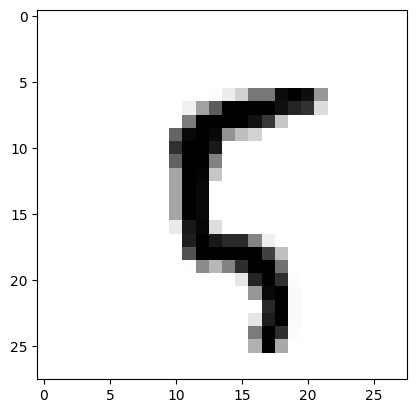

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()    # cuốn pháp  60.000:ảnh 28x28:kích thước ảnh    tín hiệu ra 60.000 và 1
hinh =  train_images[100]
plt.imshow(hinh  , cmap=plt.cm.binary)
plt.show
print('số mau là', train_labels[100])

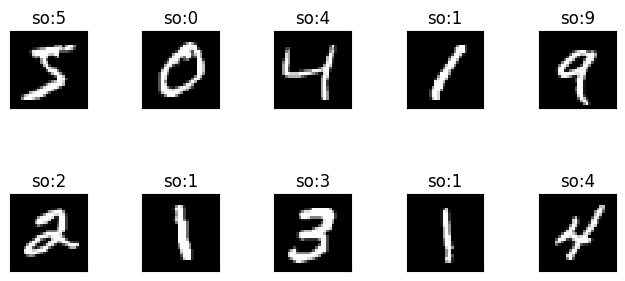

In [ ]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray', interpolation='none')
  plt.title('so:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
# XÂY DỰNG MÔ HÌNH
from keras.models import Sequential
from keras import models
from keras.layers import Dense
model = Sequential()
model.add(Dense(512,activation = 'relu', input_shape=(28*28,), name ='Lop1'))   # đầu ra  là 512( lớp 1)
model.add(Dense(10, activation = 'softmax')) # lớp 2  đưa về 10 số nên lớp 2 khai báo là 10
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Lop1 (Dense)                (None, 512)               401920    
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_images = train_images.reshape((60000,28*28)) # đầu tiên là t reset 60000 tấm ảnh và chuyển từ ảnh 2D thành ảnh 1D
train_images = train_images.astype('float32')/255        #chuyển qua mã array chuyển sang số thực
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255


In [ ]:
from keras.utils import to_categorical # chuyển qua one host encording mã hóa 1 số về số 1 dùng để chuyển cho output
train_labels = to_categorical(train_labels,10)
test_labels= to_categorical(test_labels,10)

In [ ]:
# trình biên dịch
from keras import models
model.compile(optimizer='rmsprop', loss ='categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images,train_labels, epochs=10, batch_size=128)
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)



Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2650 - accuracy: 0.9246
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1060 - accuracy: 0.9686
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0695 - accuracy: 0.9788
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0508 - accuracy: 0.9846
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0377 - accuracy: 0.9885
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0287 - accuracy: 0.9917
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0219 - accuracy: 0.9939
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0164 - accuracy: 0.9956
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0127 - accuracy: 0.9967
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0606 - accuracy: 0.9819

In [ ]:
from keras import models
from keras.models import load_model
model.save('model1.h5') # lưu vào tư mục hiện hành
model11 = load_model('model1.h5')
model11.predict(test_images[51]) # lấy dữ liệu

ValueError: ignored

In [ ]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
import numpy as np
img=load_img('number.jfif')
plt.imshow(img)                                                             #dùng cho 1 kênh màu
img=load_img('number.jfif', target_size=(28,28)) #load dữ liệu vào với kích thước 28*29 (28*28,3 ảnh 3 kênh màu)
img = img_to_array(img)   # chuyển thành mảng
print(img)
img = img.reshape(1,28*28)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=1)
